## Lab | Customer Analysis Round 3

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

**Get the data**
- Use the same jupyter file from the last lab, Customer Analysis Round 3

**EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:**

1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses broken down by response kind.
4. Show a plot of the number of responses by the sales channel.
5. Show a plot of the distribution of the total claim amount, broken down by response kind. Try a boxplot and distribution plot, for each response kind. For the distribution plot, try to plot both kinds of responses in one chart (you can try with seaborn's histplot, using the hue parameter).
6. Create a scatterplot between total claim amount and income. Play around with the parameters of the scatterplot (markersize? alpha?) and try to identify more features within the data just visually. You can also try different seaborn plots. Check to find suitable ones: https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

In [87]:
# pip install pandas


In [88]:
# pip install matplotlib


In [89]:
# pip install seaborn

In [90]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
path = 'files/csv_files/marketing_customer_analysis_cleaned.csv'
data = pd.read_csv(path)

### 1. Show DataFrame info.

In [92]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  9134 non-null   int64  
 1   Customer                    9134 non-null   object 
 2   State                       9134 non-null   object 
 3   CustomerLifetimeValue       9134 non-null   float64
 4   Response                    9134 non-null   object 
 5   Coverage                    9134 non-null   object 
 6   Education                   9134 non-null   object 
 7   EffectiveToDate             9134 non-null   object 
 8   EmploymentStatus            9134 non-null   object 
 9   Gender                      9134 non-null   object 
 10  Income                      9134 non-null   int64  
 11  LocationCode                9134 non-null   object 
 12  MaritalStatus               9134 non-null   object 
 13  MonthlyPremiumAuto          9134 

In [93]:
data.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize,months
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


### 2. Describe DataFrame.

In [94]:

data.describe()

,Unnamed: 0,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount,months
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,4566.500000,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,2636.903013,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2283.250000,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,4566.500000,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,6849.750000,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,9133.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [95]:
data.describe(include=[object])

,Customer,State,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,JG68387,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


### 3. Show a plot of the total number of responses.

In [96]:
# unique values for responses
data.Response.unique()

array(['No', 'Yes'], dtype=object)

In [97]:
n_responses = data['Response'].value_counts()

In [98]:
n_sales_channel = data['SalesChannel'].value_counts()
n_sales_channel 

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: SalesChannel, dtype: int64

### 4. Show a plot of the number of responses by the sales channel.

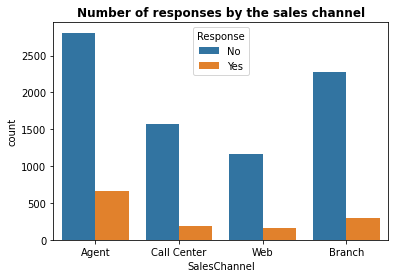

In [99]:

# count plot along y axis
sns.countplot(x ='SalesChannel', hue = "Response", data = data)

plt.xlabel('SalesChannel')
plt.title('Number of responses by the sales channel',
          fontweight ="bold")

 
# Show the plot
plt.show()

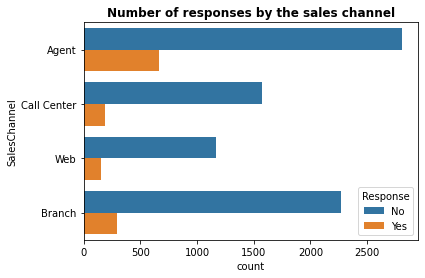

In [100]:

# count plot along y axis
sns.countplot(y ='SalesChannel', hue = "Response", data = data)

plt.ylabel('SalesChannel')
plt.title('Number of responses by the sales channel',
          fontweight ="bold")

 
# Show the plot
plt.show()

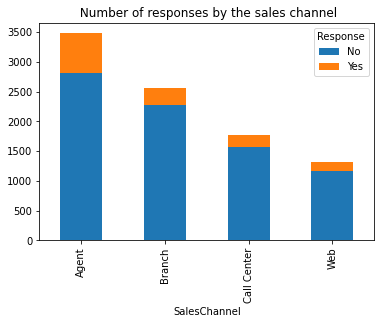

In [101]:
# other option
data.groupby(['SalesChannel','Response']).size().unstack().plot(kind='bar',stacked=True,title=" Number of responses by the sales channel")
ax = plt.show()

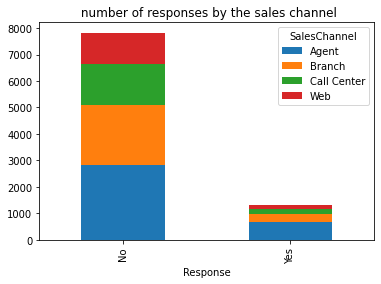

In [102]:
# other option
data.groupby(['Response','SalesChannel']).size().unstack().plot(kind='bar',stacked=True,title=" number of responses by the sales channel")
ax = plt.show()

### Show a plot of the distribution of the total claim amount, broken down by response kind. 

Try a boxplot and distribution plot, for each response kind. 

For the distribution plot, try to plot both kinds of responses in one chart (you can try with seaborn's histplot, using the hue parameter).

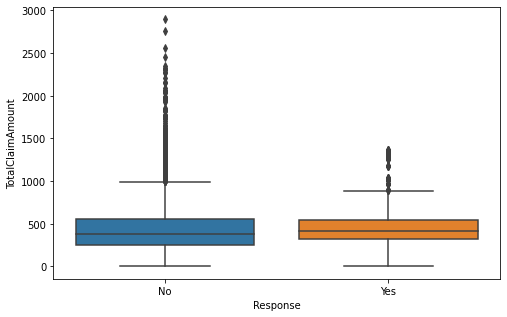

In [103]:
#a boxplot and distribution plot, for each response kind.

plt.figure(figsize=(8,5))
sns.boxplot(x = 'Response',y='TotalClaimAmount', data=data)
plt.show()

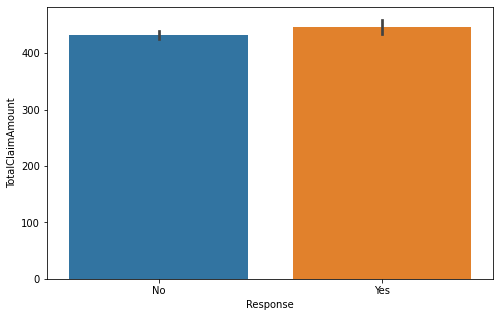

In [104]:
plt.figure(figsize=(8,5))
sns.barplot(x="Response", y="TotalClaimAmount", data=data)
plt.show()

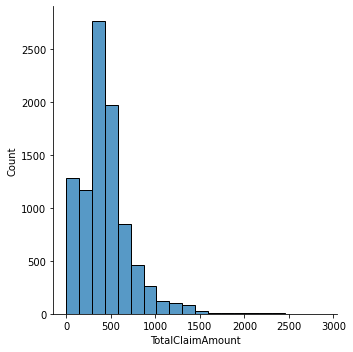

In [105]:
sns.displot(data['TotalClaimAmount'], bins=20)
plt.show()

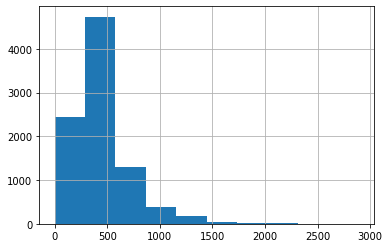

In [106]:
data['TotalClaimAmount'].hist()
plt.show()

<AxesSubplot:xlabel='TotalClaimAmount', ylabel='Count'>

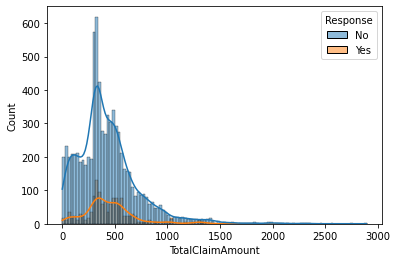

In [107]:
sns.histplot(data=data, x="TotalClaimAmount",kde=True, hue="Response")
# kde = Whether to plot a gaussian kernel density estimate

<AxesSubplot:xlabel='Income', ylabel='Count'>

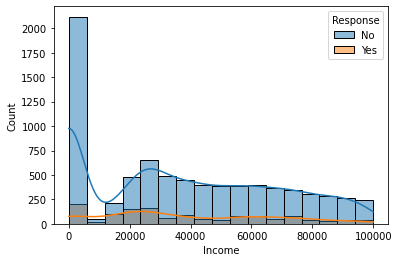

In [108]:
# Create similar plots like in the task before, but for Income
sns.histplot(data=data, x="Income",kde=True, hue="Response")

<AxesSubplot:xlabel='Income', ylabel='Count'>

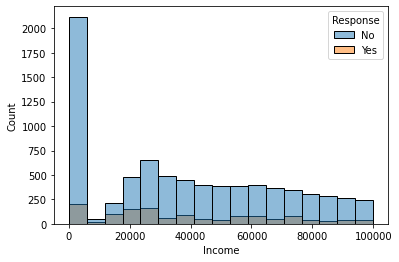

In [109]:
sns.histplot(data=data, x="Income", hue="Response")

### 6. Create a scatterplot between total claim amount and income. 

Play around with the parameters of the scatterplot (markersize? alpha?). 

Try to identify more features within the data just visually. 
You can also try different seaborn plots.

In [110]:
# * NEW: Create a scatterplot between total claim amount and income. 
#     Play around with the parameters of the scatterplot (markersize? alpha?) 
#     and try to identify more features within the data just visually. You can also try different seaborn plots. 
#     Check to find suitable ones: 
#         https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

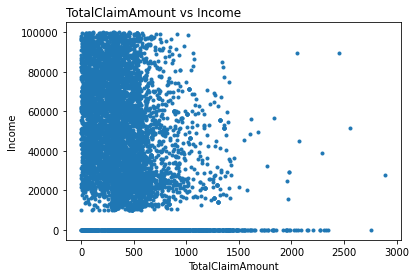

In [111]:
#plot
plt.scatter(x=data['TotalClaimAmount'], y=data['Income'], marker=".")

# titles
plt.xlabel('TotalClaimAmount')
plt.ylabel('Income')
plt.title('TotalClaimAmount vs Income', loc='left')
plt.show()

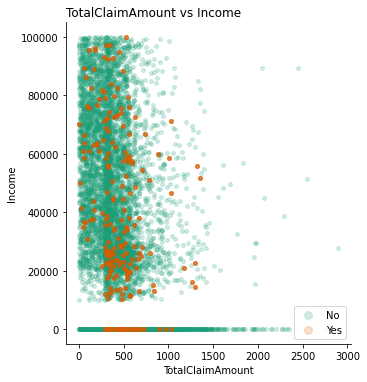

In [112]:
# Plot

sns.lmplot( x='TotalClaimAmount', y='Income', data=data, fit_reg=False, hue='Response', 
           legend=False, palette="Dark2", scatter_kws={"alpha":0.2,"s":15} )
 
# Legend
plt.legend(loc='lower right', markerscale=2)
 
# titles
plt.xlabel('TotalClaimAmount')
plt.ylabel('Income')
plt.title('TotalClaimAmount vs Income', loc='left')
plt.show()

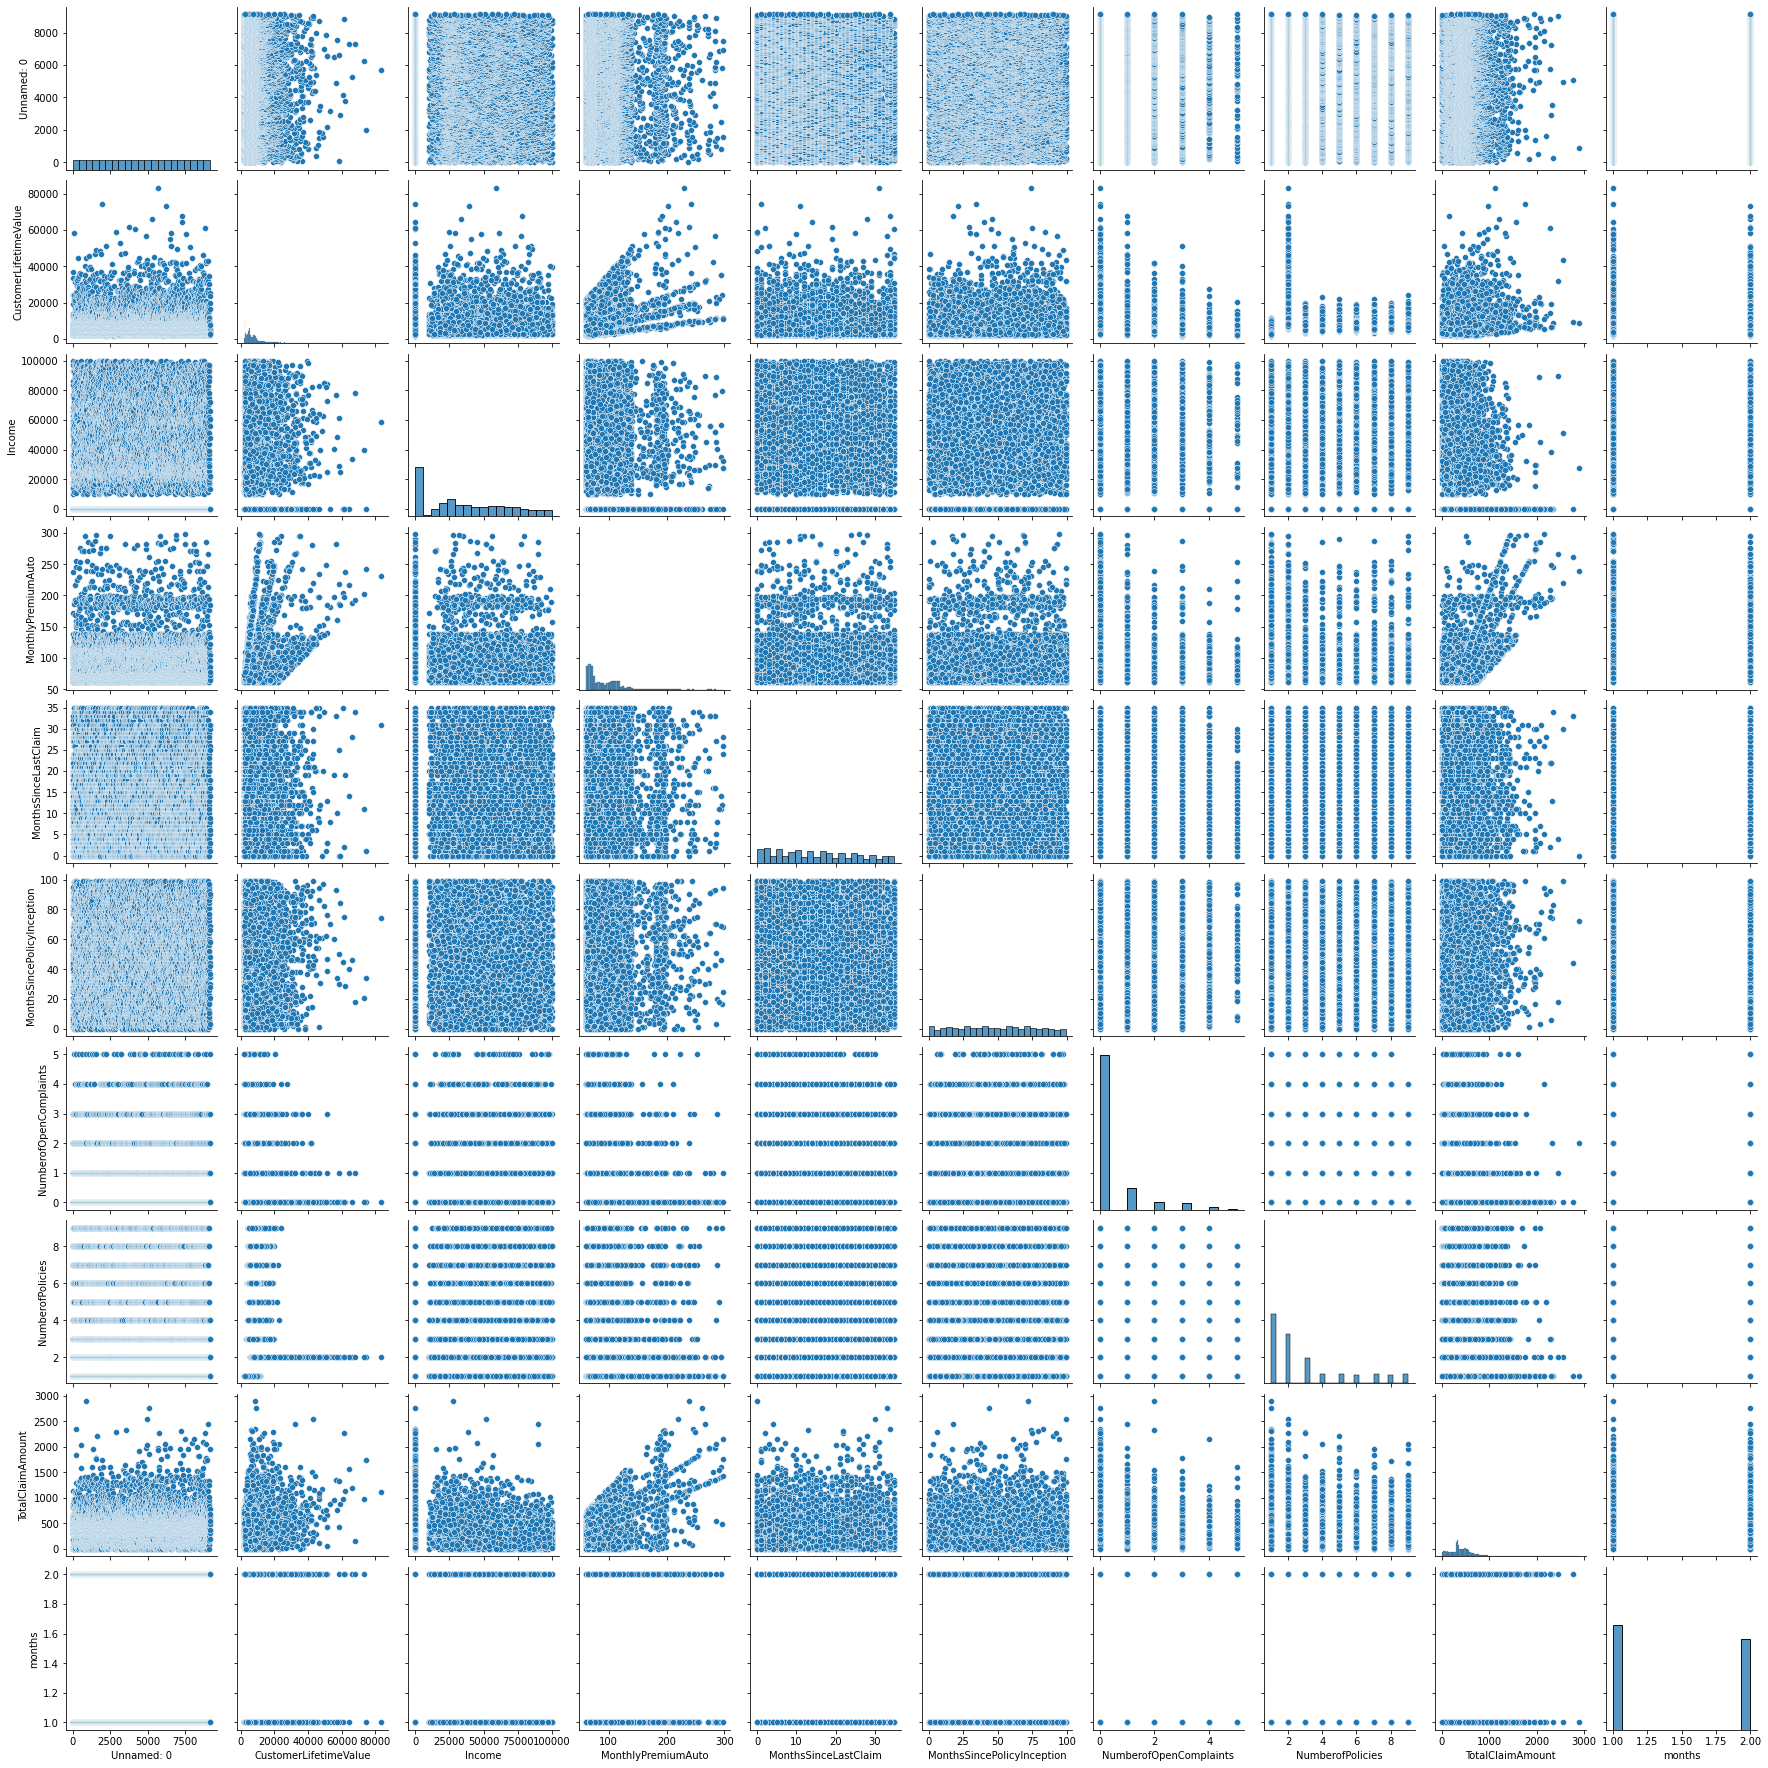

In [113]:

sns.pairplot(data)
plt.show()

### Exploring the dataset

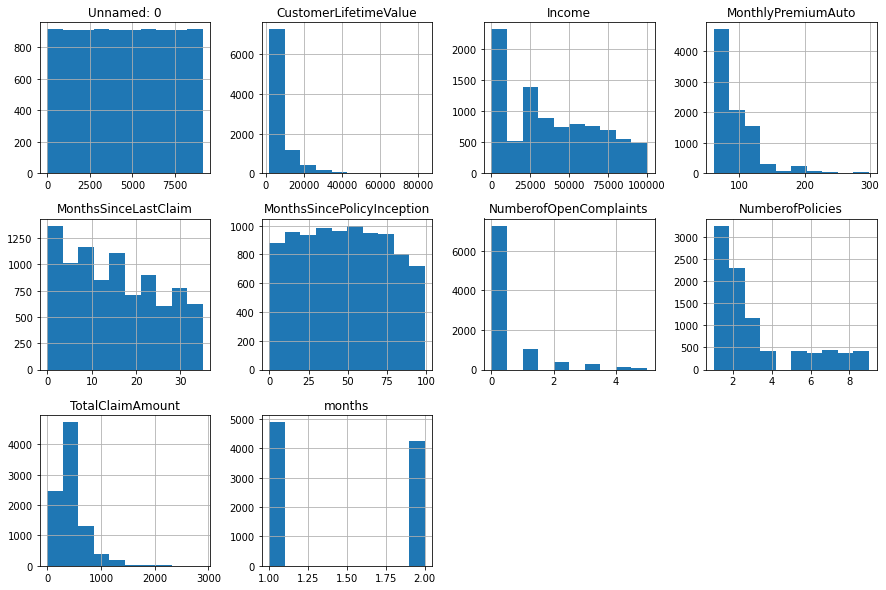

In [114]:
hist = data.hist(figsize=(15,10),layout=(3,4))

In [115]:
# list numerical columns
# numeric_cols = data.select_dtypes([np.number]).columns
# print(numeric_cols)

### For correlations_matrix and heatmap

In [116]:
data.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize,months
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [117]:
# remove index, unnamed  column
# data.reset_index(drop=True, inplace=True)
data= data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [118]:
data.head()

,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize,months
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [119]:
# List categorial columns and drop them
categorical_cols = data.select_dtypes([object]).columns
# categorical_cols
corr_data = data.drop(categorical_cols,  axis=1)

<AxesSubplot:>

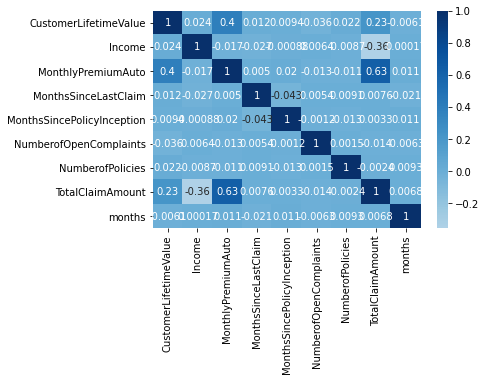

In [120]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, cmap="Blues", center=0, annot=True)

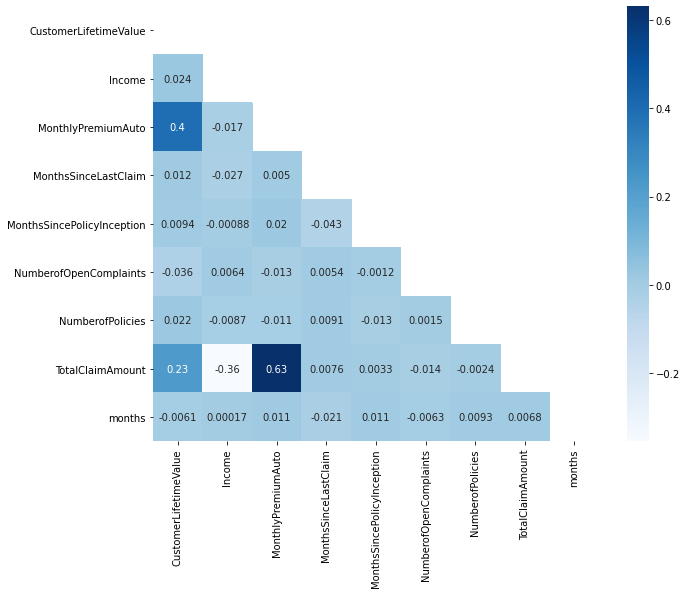

In [121]:
#use the mask technique to make it easier to read 
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, cmap="Blues", mask=mask, annot=True)
plt.show()